# Cat and Dog Classifier

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train_dir = r"cats_and_dogs\train"
validation_dir = r"cats_and_dogs\validation"
test_dir = r"cats_and_dogs\test"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory( validation_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import InceptionResNetV2

In [6]:
conv_base = InceptionResNetV2(weights='imagenet',
                  include_top = False,
                  input_shape=(150, 150, 3))

In [7]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________

batch_normalization_101 (BatchN (None, 7, 7, 128)    384         conv2d_101[0][0]                 
__________________________________________________________________________________________________
activation_101 (Activation)     (None, 7, 7, 128)    0           batch_normalization_101[0][0]    
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, 7, 7, 160)    143360      activation_101[0][0]             
__________________________________________________________________________________________________
batch_normalization_102 (BatchN (None, 7, 7, 160)    480         conv2d_102[0][0]                 
__________________________________________________________________________________________________
activation_102 (Activation)     (None, 7, 7, 160)    0           batch_normalization_102[0][0]    
__________________________________________________________________________________________________
conv2d_100

__________________________________________________________________________________________________
block8_10_mixed (Concatenate)   (None, 3, 3, 448)    0           activation_199[0][0]             
                                                                 activation_202[0][0]             
__________________________________________________________________________________________________
block8_10_conv (Conv2D)         (None, 3, 3, 2080)   933920      block8_10_mixed[0][0]            
__________________________________________________________________________________________________
block8_10 (Lambda)              (None, 3, 3, 2080)   0           block8_9_ac[0][0]                
                                                                 block8_10_conv[0][0]             
__________________________________________________________________________________________________
conv_7b (Conv2D)                (None, 3, 3, 1536)   3194880     block8_10[0][0]                  
__________

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 13824)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3539200   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [11]:
conv_base.trainable = False

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 13824)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3539200   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 3,539,457
Non-trainable params: 54,336,736
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy',
             optimizer = keras.optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [14]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('InceptionResNetV2 Model - Cat and Dog Classifier/Model-{epoch:02d}.h5')

In [15]:
model_history = model.fit(train_generator, epochs=30,
                         steps_per_epoch=63,
                         validation_data = validation_generator,
                         validation_steps=32,
                         callbacks=[checkpoint_cb])

Epoch 1/30
63/63 [==============================] - 164s 3s/step - loss: 0.3060 - acc: 0.8880 - val_loss: 0.0876 - val_acc: 0.9670
Epoch 2/30
63/63 [==============================] - 175s 3s/step - loss: 0.1858 - acc: 0.9280 - val_loss: 0.0689 - val_acc: 0.9770
Epoch 3/30
63/63 [==============================] - 158s 3s/step - loss: 0.1705 - acc: 0.9355 - val_loss: 0.1017 - val_acc: 0.9640
Epoch 4/30
63/63 [==============================] - 158s 3s/step - loss: 0.1701 - acc: 0.9335 - val_loss: 0.0989 - val_acc: 0.9690
Epoch 5/30
63/63 [==============================] - 167s 3s/step - loss: 0.1442 - acc: 0.9445 - val_loss: 0.0591 - val_acc: 0.9810
Epoch 6/30
63/63 [==============================] - 157s 2s/step - loss: 0.1463 - acc: 0.9450 - val_loss: 0.0872 - val_acc: 0.9700
Epoch 7/30
63/63 [==============================] - 156s 2s/step - loss: 0.1282 - acc: 0.9485 - val_loss: 0.0733 - val_acc: 0.9760
Epoch 8/30
63/63 [==============================] - 157s 2s/step - loss: 0.1265 - a

In [16]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 63}

In [17]:
model_history.history

{'loss': [0.30603140592575073,
  0.18582892417907715,
  0.17047762870788574,
  0.17005792260169983,
  0.1442335993051529,
  0.146303191781044,
  0.12820053100585938,
  0.12645813822746277,
  0.14128248393535614,
  0.10981034487485886,
  0.11796838045120239,
  0.10820264369249344,
  0.09973978996276855,
  0.10776691883802414,
  0.11562930047512054,
  0.10233733057975769,
  0.10742471367120743,
  0.10324236005544662,
  0.09465925395488739,
  0.10126964002847672,
  0.09733129292726517,
  0.08438261598348618,
  0.08725661784410477,
  0.11097182333469391,
  0.08778911083936691,
  0.09999594837427139,
  0.09847941994667053,
  0.09966442734003067,
  0.09126289188861847,
  0.08146494626998901],
 'acc': [0.8880000114440918,
  0.9279999732971191,
  0.9355000257492065,
  0.9334999918937683,
  0.9445000290870667,
  0.9449999928474426,
  0.9484999775886536,
  0.9520000219345093,
  0.9430000185966492,
  0.9539999961853027,
  0.9564999938011169,
  0.9589999914169312,
  0.9580000042915344,
  0.9610000

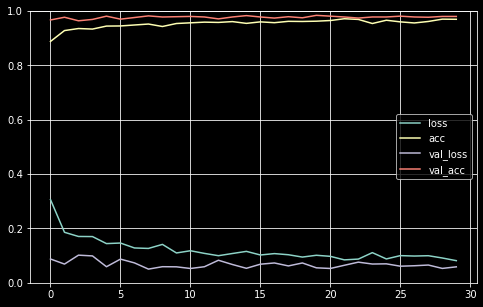

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
hist_df = pd.DataFrame(model_history.history)

In [21]:
hist_csv_file = 'InceptionResNetV2 Model History.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [22]:
test_generator = test_datagen.flow_from_directory( test_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [24]:
model.evaluate(test_generator, steps=50)

50/50 [==============================] - 64s 1s/step - loss: 0.0878 - acc: 0.9690


[0.08784880489110947, 0.968999981880188]